# **IRIS FLOWER CLASSIFICATION- TASK 3**

### **Author - Saru Pradhan**

##### **importing necessary libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### **data loading**

In [10]:
iris_data = pd.read_csv("iris.csv", encoding="latin1")

In [12]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
iris_data.shape

(150, 5)

In [26]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
iris_data.nunique

<bound method DataFrame.nunique of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [36]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
iris_data['sepal_length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [40]:
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [42]:
iris_data['sepal_length'].value_counts()

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [44]:
iris_data['petal_length'].value_counts()

petal_length
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64

##### **Exploratory Data Analysis (EDA)**

##### **data cleaning**

In [51]:
print("Null values in each column:")
iris_data.isnull().sum()

Null values in each column:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

***Hence its time to visualize the data as there is no null value in any column***

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

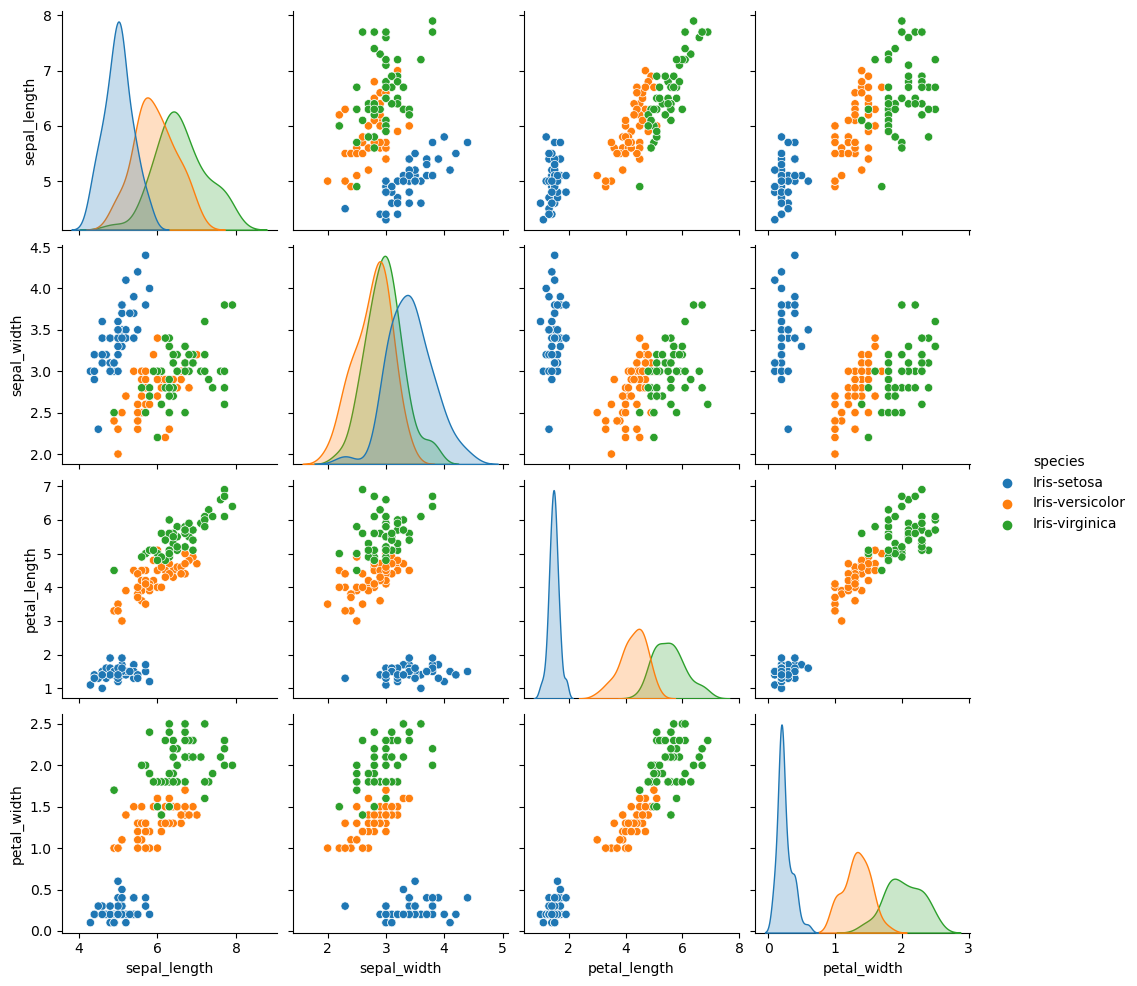

In [62]:
sns.pairplot(iris_data, hue='species')
plt.show()

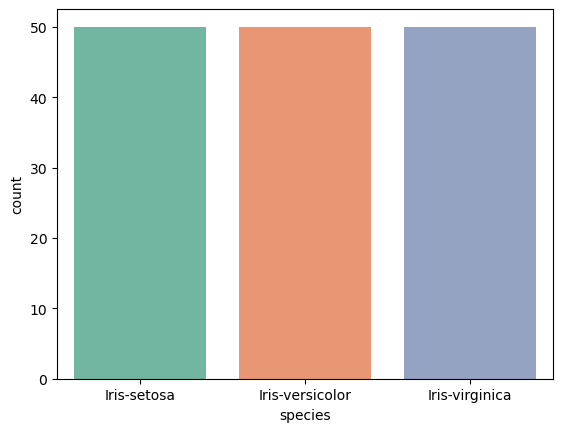

In [74]:
#Created a bar chart to see the count of species category
sns.countplot(x = 'species', data = iris_data, palette = "Set2")
plt.show()

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='Count'>

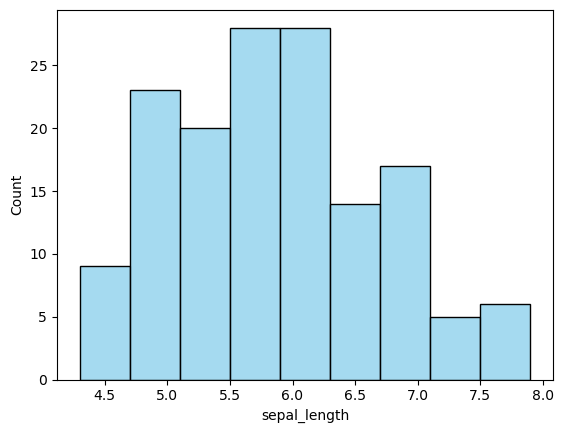

In [76]:
#Built a histogram for sepal_length data to know the relation
sns.histplot(data = iris_data , x = iris_data.sepal_length ,color = 'skyblue')

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Count'>

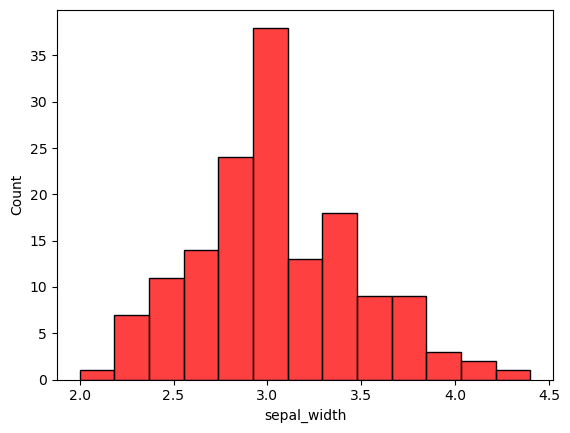

In [80]:
#Built a histogram for sepal_width data to know the relation
sns.histplot(data = iris_data , x = iris_data.sepal_width ,color = 'red')

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_width', ylabel='Count'>

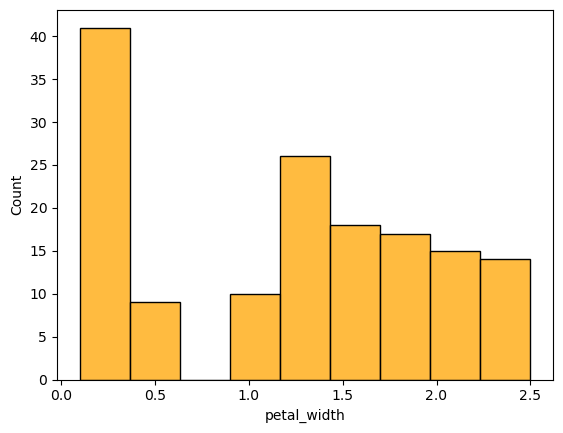

In [82]:
#Built a histogram for petal_width data to know the relation
sns.histplot(data = iris_data , x = iris_data.petal_width ,color = 'orange')

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_length', ylabel='Count'>

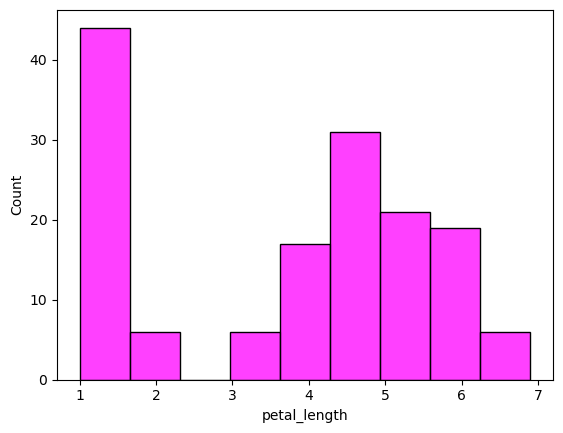

In [86]:
#Built a histogram for petal_length data to know the relation
sns.histplot(data = iris_data , x = iris_data.petal_length ,color = 'magenta')    

<Axes: >

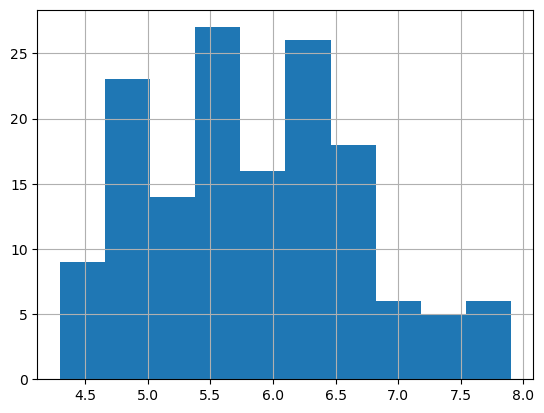

In [88]:
# histograms
iris_data['sepal_length'].hist()

<Axes: >

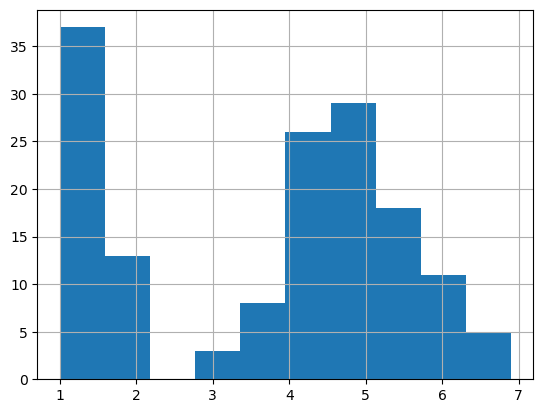

In [90]:
iris_data['petal_length'].hist()

<Axes: >

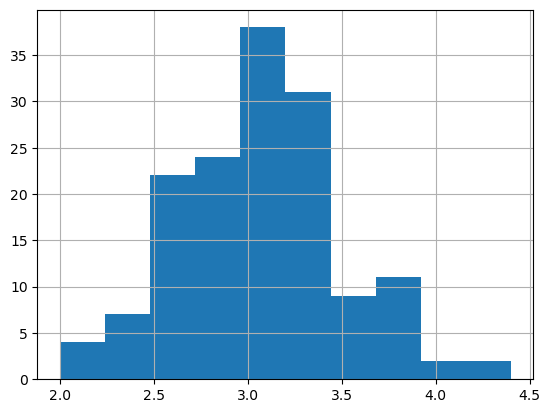

In [92]:
# histograms
iris_data['sepal_width'].hist()

<Axes: >

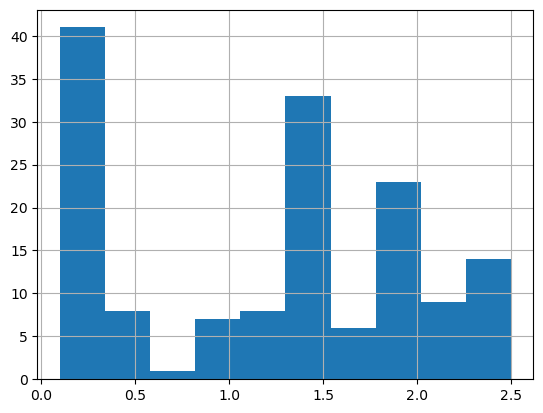

In [94]:
# histograms
iris_data['petal_width'].hist()

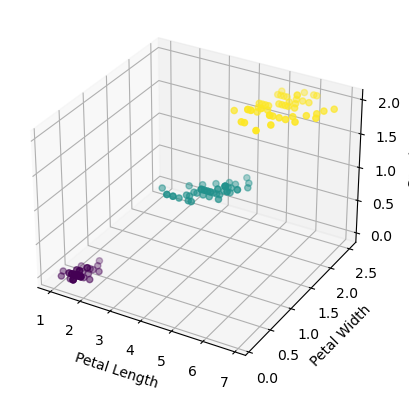

In [110]:
from sklearn.preprocessing import LabelEncoder
# Encode the species column to numeric values
encoder = LabelEncoder()
iris_data['species_encoded'] = encoder.fit_transform(iris_data['species'])
# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_data.petal_length, iris_data.petal_width, iris_data.species_encoded, c=iris_data.species_encoded, cmap='viridis')
# Set labels
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Species')
# Show the plot
plt.show()

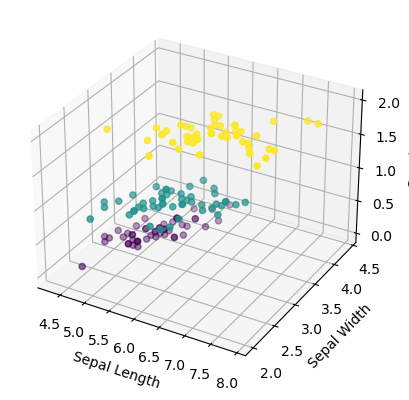

In [112]:
# Encode the species column to numeric values
encoder = LabelEncoder()
iris_data['species_encoded'] = encoder.fit_transform(iris_data['species'])
# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_data.sepal_length, iris_data.sepal_width, iris_data.species_encoded, c=iris_data.species_encoded, cmap='viridis')
# Set labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Species')
# Show the plot
plt.show()

*Thus 3-D plot gives us the glimpse of species of iris flower is more inclined towards the variables petal length and petal width*

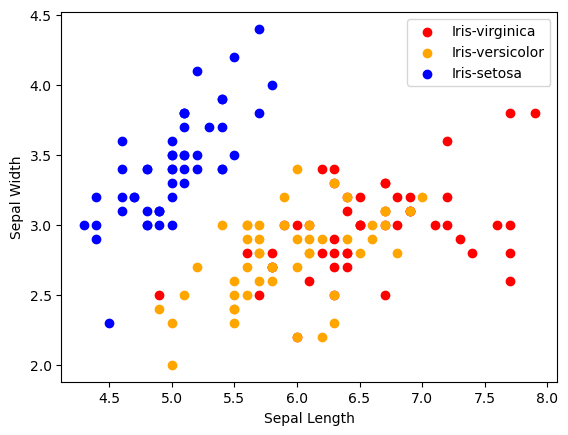

In [119]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

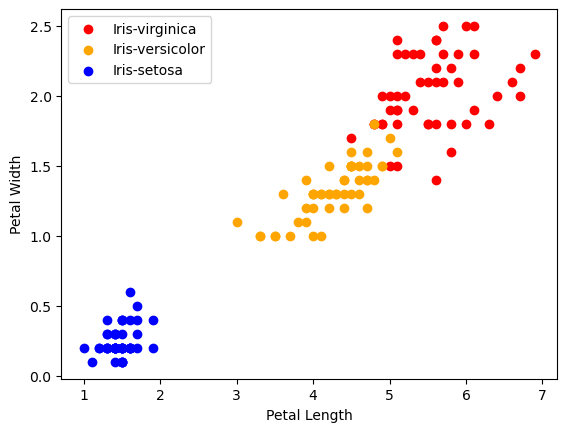

In [123]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

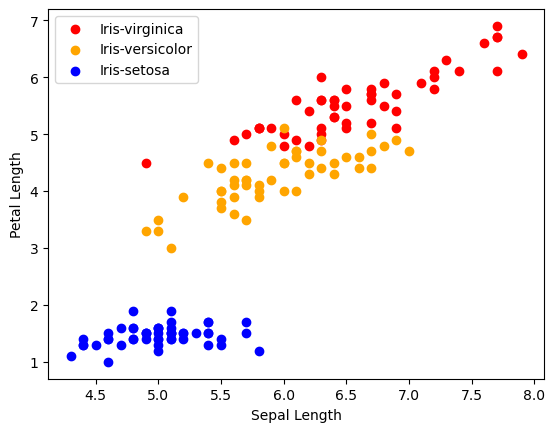

In [125]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

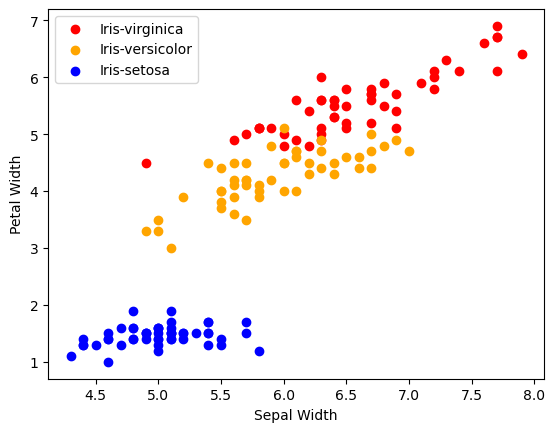

In [127]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [133]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


<Axes: >

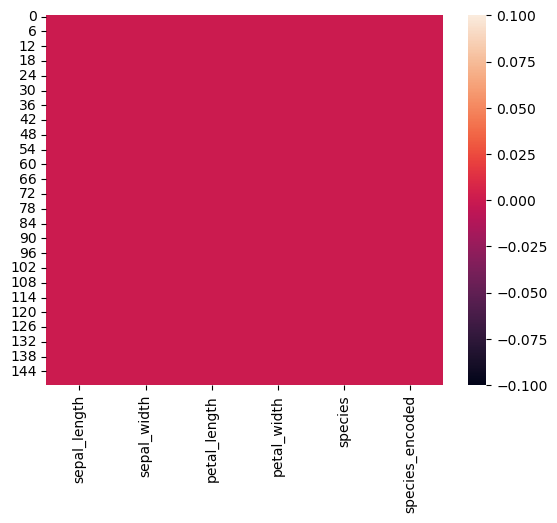

In [139]:
sns.heatmap(iris_data.isnull())

In [141]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_encoded'],
      dtype='object')

In [ ]:
# Factorize the 'species' column
iris_data['species_encoded'], categories = pd.factorize(iris_data['species'])
# Drop the 'species' column
iris_data = iris_data.drop(columns=['species'])

In [153]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

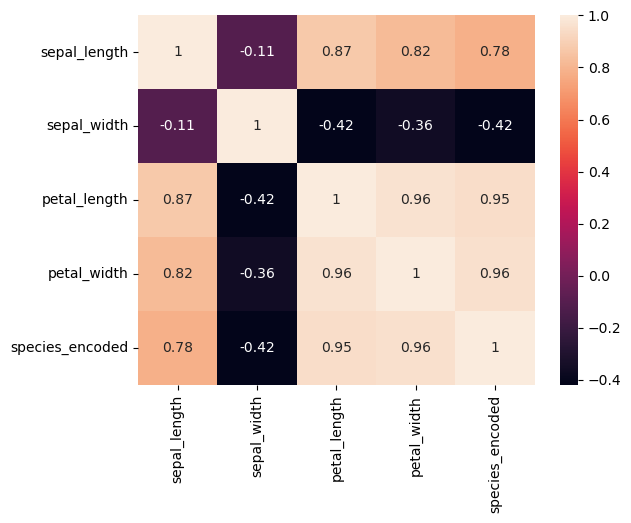

In [155]:
#Creating a heatmap to see the feature-wise correlation in the dataset
corr = iris_data.corr()
sns.heatmap(corr, annot = True)

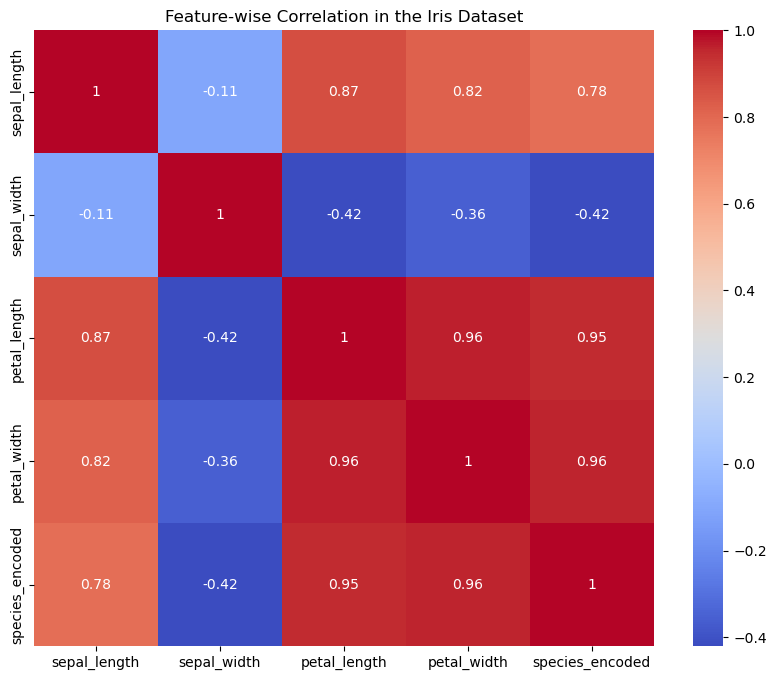

In [161]:
# Create the correlation matrix
corr = iris_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature-wise Correlation in the Iris Dataset')
plt.show()

#### **Data Preprocessing**

In [168]:
from sklearn.model_selection import train_test_split

In [174]:
# Assigning the predictor and target variable
X = iris_data.drop(['species_encoded'],axis=1)
y = iris_data.species_encoded

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

**Logistic Regression**

In [179]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [183]:
# model training
model.fit(X_train, y_train)

LogisticRegression()

In [187]:
# print metric to get performance
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  100.0


In [189]:
# Make predictions
y_pred = model.predict(X_test)

In [191]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [201]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [203]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [205]:
# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


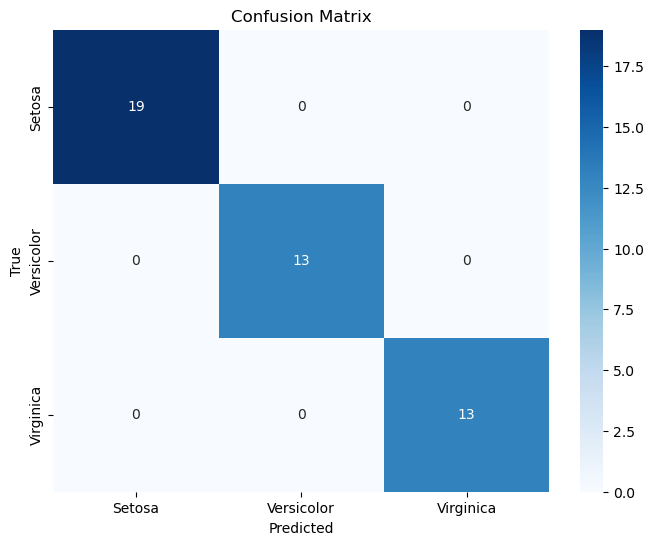

In [217]:
class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [219]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [221]:
from sklearn.model_selection import cross_val_score

# Assuming model is already trained and X, y are your features and labels
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}')

Cross-Validation Accuracy Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Cross-Validation Accuracy: 0.97


C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

##### **knn**

In [224]:
from sklearn.preprocessing import StandardScaler
# Assuming `X` is your feature matrix and `y` is your target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [226]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [228]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=5 (you can choose another value for k)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [230]:
# Predict on the test set
y_pred = knn.predict(X_test)


In [236]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
report = classification_report(y_test, y_pred)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [238]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)

# Print cross-validation scores and their mean
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-Validation Accuracy: 0.96


In [256]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**For testing, We create a new dataframe with values close to the any of our existing data to evaluate.**

In [284]:
data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)

In [260]:
# Predict the movie rating by entered data
result = model.predict(trail)

# Display the predicted result from the Model
print("Result Species:", result[0])

Result Species: 0


##### **decision tree**

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [265]:
# Define features and target
X1 = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y1 = iris_data['species_encoded']

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [267]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [269]:
y_pred = dt_model.predict(X_test)

**Evaluate the model**

In [273]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [275]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


In [277]:
cr = classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica'])
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.85      0.92        13
   Virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



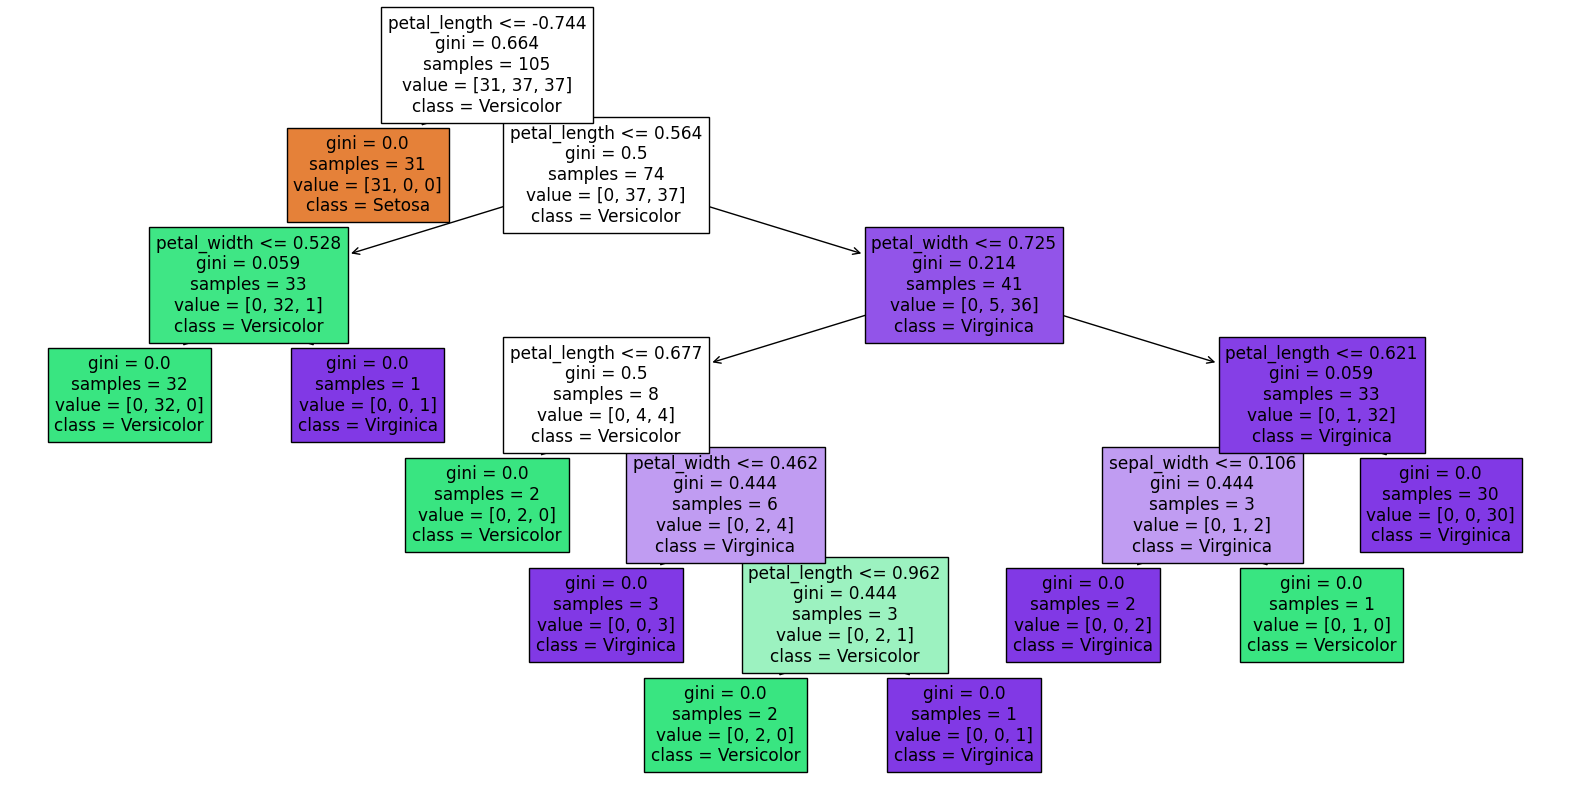

In [281]:
plt.figure(figsize=(20,10))
# Convert column names to a list
feature_names = X.columns.tolist()
class_names = ['Setosa', 'Versicolor', 'Virginica']
tree.plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()